<a href="https://colab.research.google.com/github/abhinavgairola/Anomaly_Detection_OTC_Market/blob/main/EDA%2BMachine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pycaret



In [16]:
import csv
from pycaret.classification import *
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data = {}
with open('/content/drive/MyDrive/OTCMKT/Final_data.csv') as f:
  csv_file = csv.DictReader(f)
  for idx,row in enumerate(csv_file):
    data[idx]=(dict(row))  

In [4]:
df = pd.DataFrame(data)

In [5]:
df=df.reset_index()

In [6]:

df = df.T
columns = df.loc['index',:]
df = df.drop('index',axis=0)
df = df.rename(columns=columns)

In [7]:
df = df.set_index('Date')


In [8]:
df = df.replace('', '0')


In [9]:
columns = list(df.columns)

In [10]:
columns.remove('Ticker_name')

In [11]:
columns

['Indicator', 'Price', 'Sentiment_Score', 'Tweet_counts', 'Volume']

In [12]:
df[columns]=df[columns].astype(float)

In [13]:
columns.remove('Indicator')
columns.remove('Price')

##Dataset in not normalized

In [14]:
from sklearn import preprocessing
print(columns)
x = df[columns].values 
Standard_scaler = preprocessing.StandardScaler()
x_scaled = Standard_scaler.fit_transform(x)
df_new = pd.DataFrame(x_scaled)
df_new.columns = columns

['Sentiment_Score', 'Tweet_counts', 'Volume']


In [17]:
df_new['Indicator'] = list(df.Indicator.values)
df_new['Price'] = list(df.Price.apply(lambda x: math.log1p(x) ).values)
df_new['Tickers'] = list(df.Ticker_name.values)
df_new = df_new.set_index(df.index)

In [18]:
df_new

,Sentiment_Score,Tweet_counts,Volume,Indicator,Price,Tickers
Date,,,,,,
2016-09-16,0.432992,-0.289043,-0.520014,0.0,0.137597,RGBP
2016-09-20,2.464075,1.063349,-0.516444,0.0,0.130438,RGBP
2016-09-21,-0.002017,-0.221634,-0.521036,0.0,0.117961,RGBP
2016-09-22,-0.711980,-0.107881,-0.518695,0.0,0.128613,RGBP
2016-09-29,-0.387962,-0.267978,-0.521649,0.0,0.119457,RGBP
...,...,...,...,...,...,...
2016-05-24,0.293547,0.241802,-0.522189,0.0,0.073111,PRHL
2016-05-27,-0.652031,0.532504,-0.522661,0.0,0.063092,PRHL
2016-05-31,0.373833,0.671534,-0.517209,0.0,0.070691,PRHL


In [19]:
columns = list(df_new.columns)
columns.remove('Tickers')

In [20]:
columns

['Sentiment_Score', 'Tweet_counts', 'Volume', 'Indicator', 'Price']

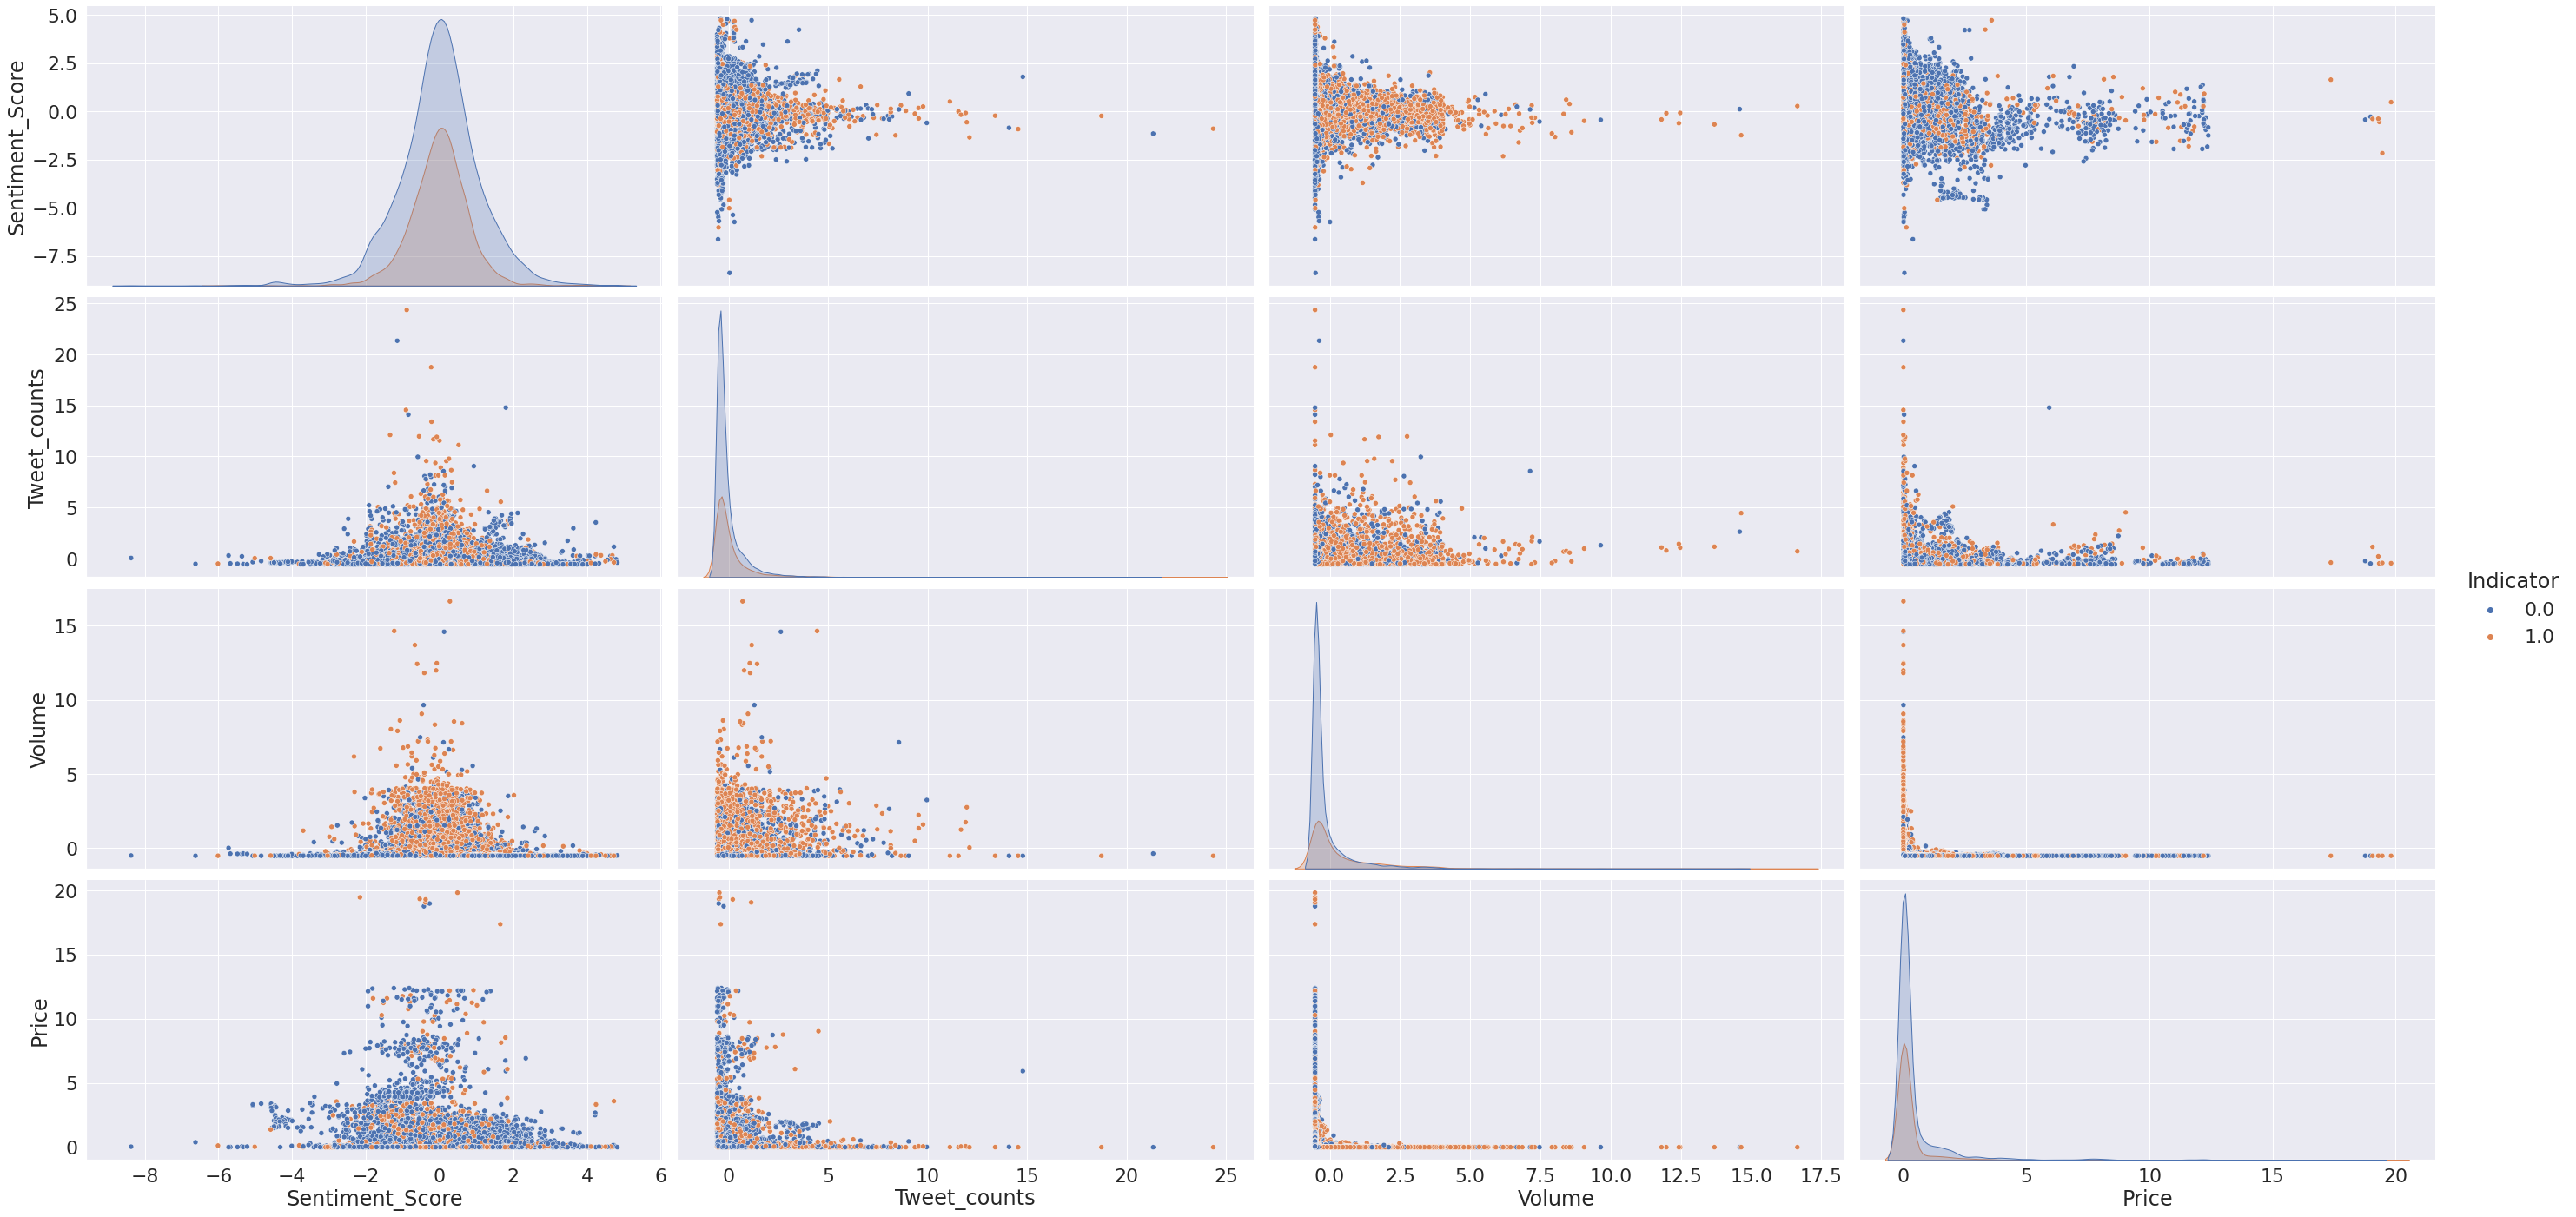

In [21]:
sns.set(font_scale = 2)
sns.pairplot(df_new[columns], hue='Indicator',height=5, 
    aspect=2)


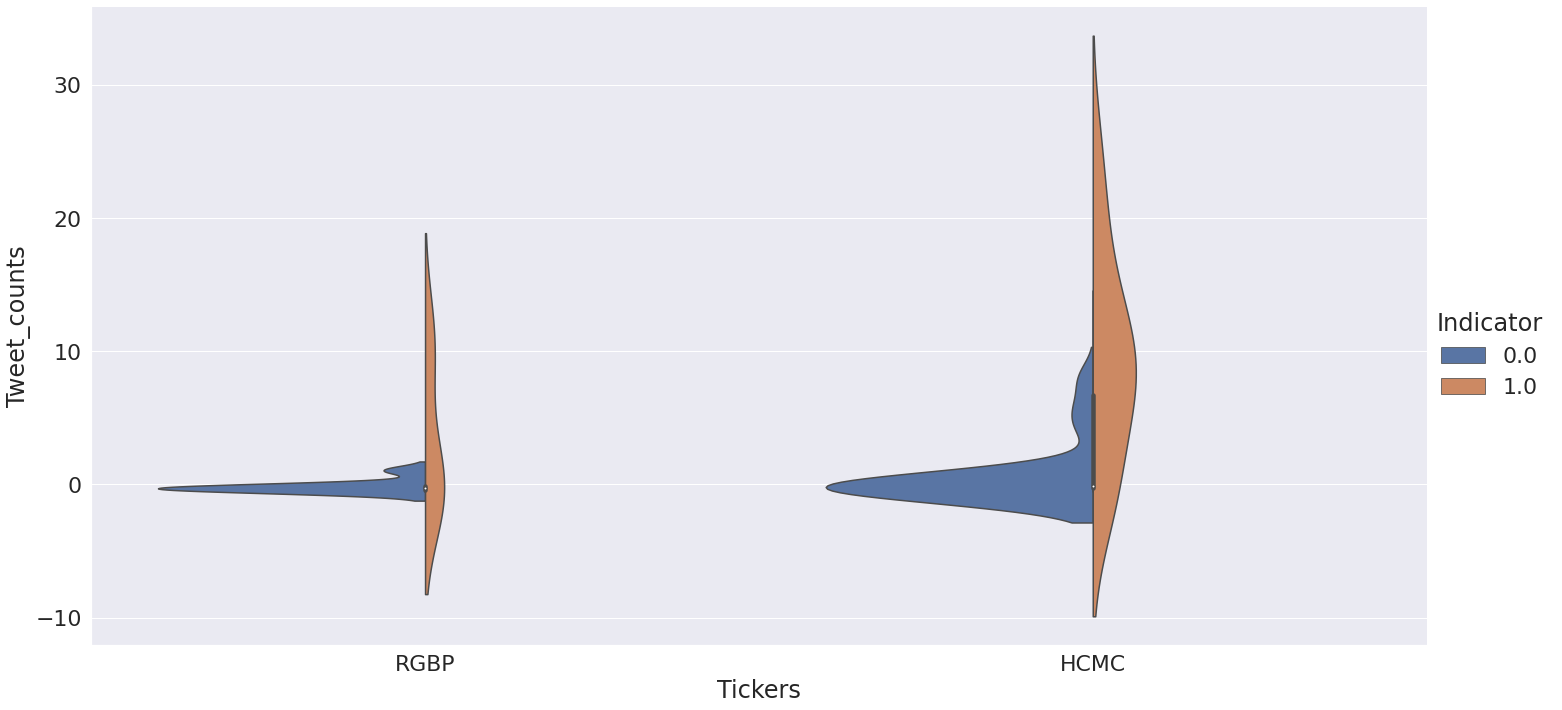

In [22]:

sns.catplot(
    data=df_new[0:50],
    x='Tickers',
    y='Tweet_counts',
    hue='Indicator',
    kind='violin',split=True,
    height=10,
    aspect=2)


(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 <a list of 9 Text major ticklabel objects>)

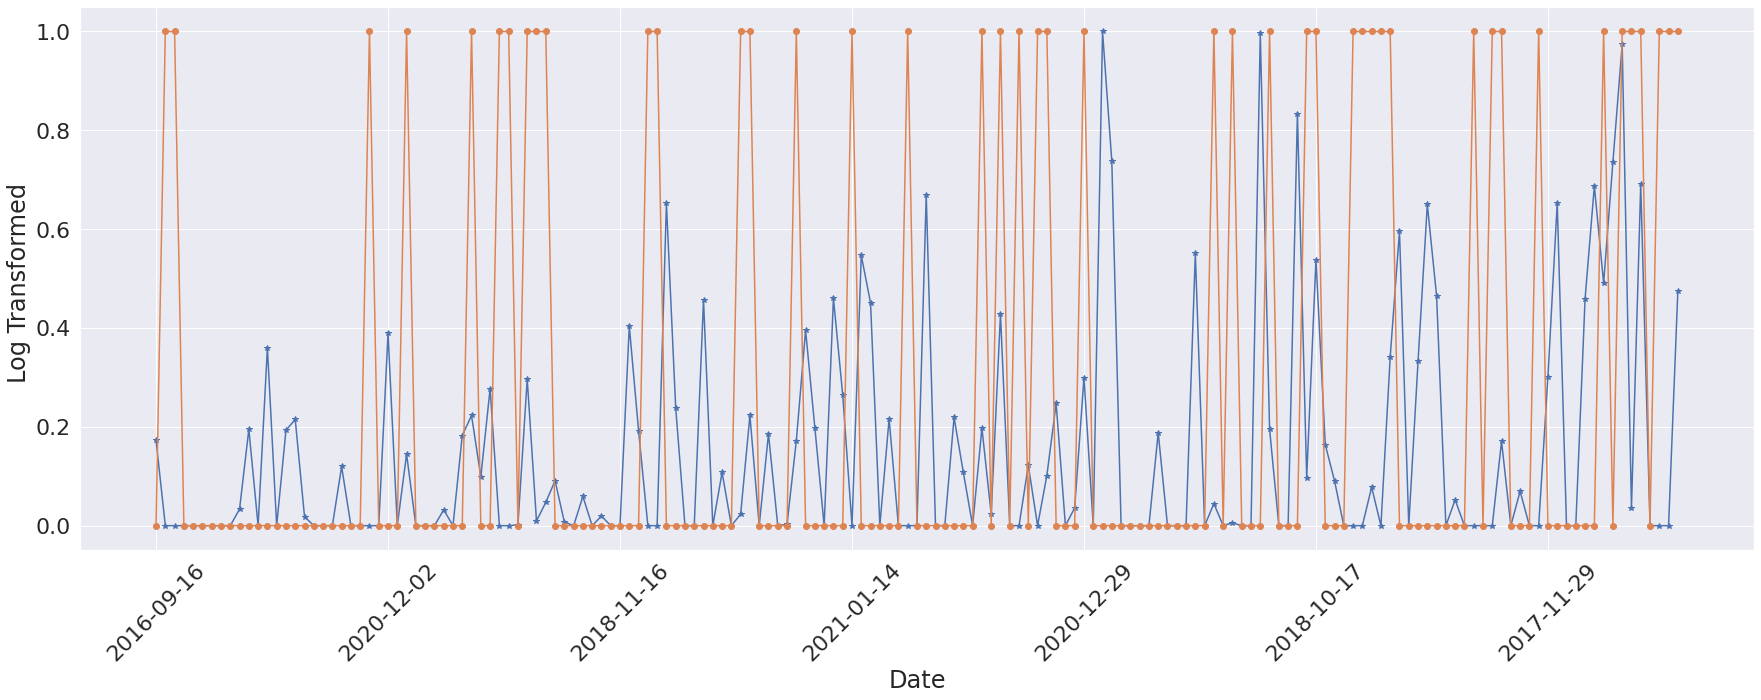

In [23]:
def neg(x):
  if x<0:
    return 0
  elif x>0:
    return x

plot_var = df_new.Sentiment_Score[0::90]
plot_var = plot_var.divide(plot_var.max()).apply(neg)
#plot_var = (plot_var-plot_var.min())/(plot_var.max()-plot_var.min())

plot_var2 = df_new.Indicator[0::90]
plot_var2 = plot_var2/plot_var2.max()
plot_var.plot(x=df_new.index,figsize=(30,10),marker='*')
plot_var2.plot(x=df_new.index,figsize=(30,10),marker='o')
plt.xlabel('Date')
plt.ylabel('Log Transformed ')
plt.xticks(rotation=45)

In [47]:
df_new

,Sentiment_Score,Tweet_counts,Volume,Indicator,Price,Tickers
Date,,,,,,
2016-09-16,0.432992,-0.289043,-0.520014,0.0,0.137597,RGBP
2016-09-20,2.464075,1.063349,-0.516444,0.0,0.130438,RGBP
2016-09-21,-0.002017,-0.221634,-0.521036,0.0,0.117961,RGBP
2016-09-22,-0.711980,-0.107881,-0.518695,0.0,0.128613,RGBP
2016-09-29,-0.387962,-0.267978,-0.521649,0.0,0.119457,RGBP
...,...,...,...,...,...,...
2016-05-24,0.293547,0.241802,-0.522189,0.0,0.073111,PRHL
2016-05-27,-0.652031,0.532504,-0.522661,0.0,0.063092,PRHL
2016-05-31,0.373833,0.671534,-0.517209,0.0,0.070691,PRHL


In [74]:
exp_clf = setup(df_new, target = 'Indicator',use_gpu=True)

,Description,Value
0,session_id,3771
1,Target,Indicator
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(14819, 6)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [77]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7486,0.7435,0.3160,0.7305,0.4411,0.3103,0.3557
1,0.7293,0.7404,0.2599,0.6855,0.3769,0.2464,0.2937
2,0.7380,0.7509,0.3303,0.6708,0.4426,0.2964,0.3282
3,0.7522,0.7786,0.3681,0.7018,0.4829,0.3402,0.3708
4,0.7416,0.7519,0.3313,0.6835,0.4463,0.3033,0.3371
5,0.7088,0.7531,0.3129,0.5667,0.4032,0.2312,0.2491
6,0.7338,0.7191,0.3067,0.6667,0.4202,0.2769,0.3121
7,0.7599,0.7607,0.3466,0.7584,0.4758,0.3470,0.3918
8,0.7310,0.7284,0.3221,0.6442,0.4294,0.2782,0.3068
9,0.7493,0.7553,0.3620,0.6941,0.4758,0.3318,0.3622


In [78]:
tuned_lr = tune_model(lr,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6744,0.7421,0.6442,0.4861,0.5541,0.3055,0.3130
1,0.7023,0.7382,0.5963,0.5242,0.5579,0.3349,0.3365
2,0.7129,0.7508,0.6636,0.5358,0.5929,0.3750,0.3802
3,0.7242,0.7781,0.6902,0.5488,0.6114,0.4019,0.4083
4,0.7030,0.7494,0.6656,0.5216,0.5849,0.3589,0.3654
5,0.6943,0.7528,0.6656,0.5106,0.5779,0.3448,0.3522
6,0.6654,0.7192,0.5675,0.4731,0.5160,0.2635,0.2661
7,0.7232,0.7629,0.6687,0.5491,0.6030,0.3937,0.3982
8,0.6837,0.7292,0.6104,0.4975,0.5482,0.3088,0.3126
9,0.6991,0.7570,0.6718,0.5165,0.5840,0.3546,0.3621


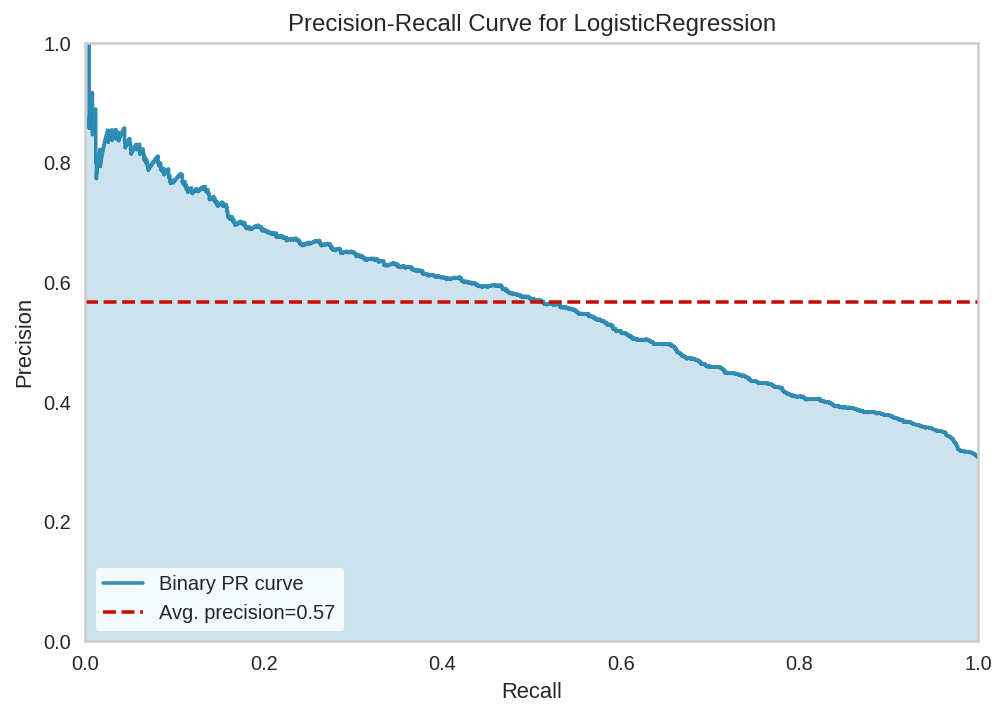

In [79]:
plot_model(lr,'pr',scale=2)

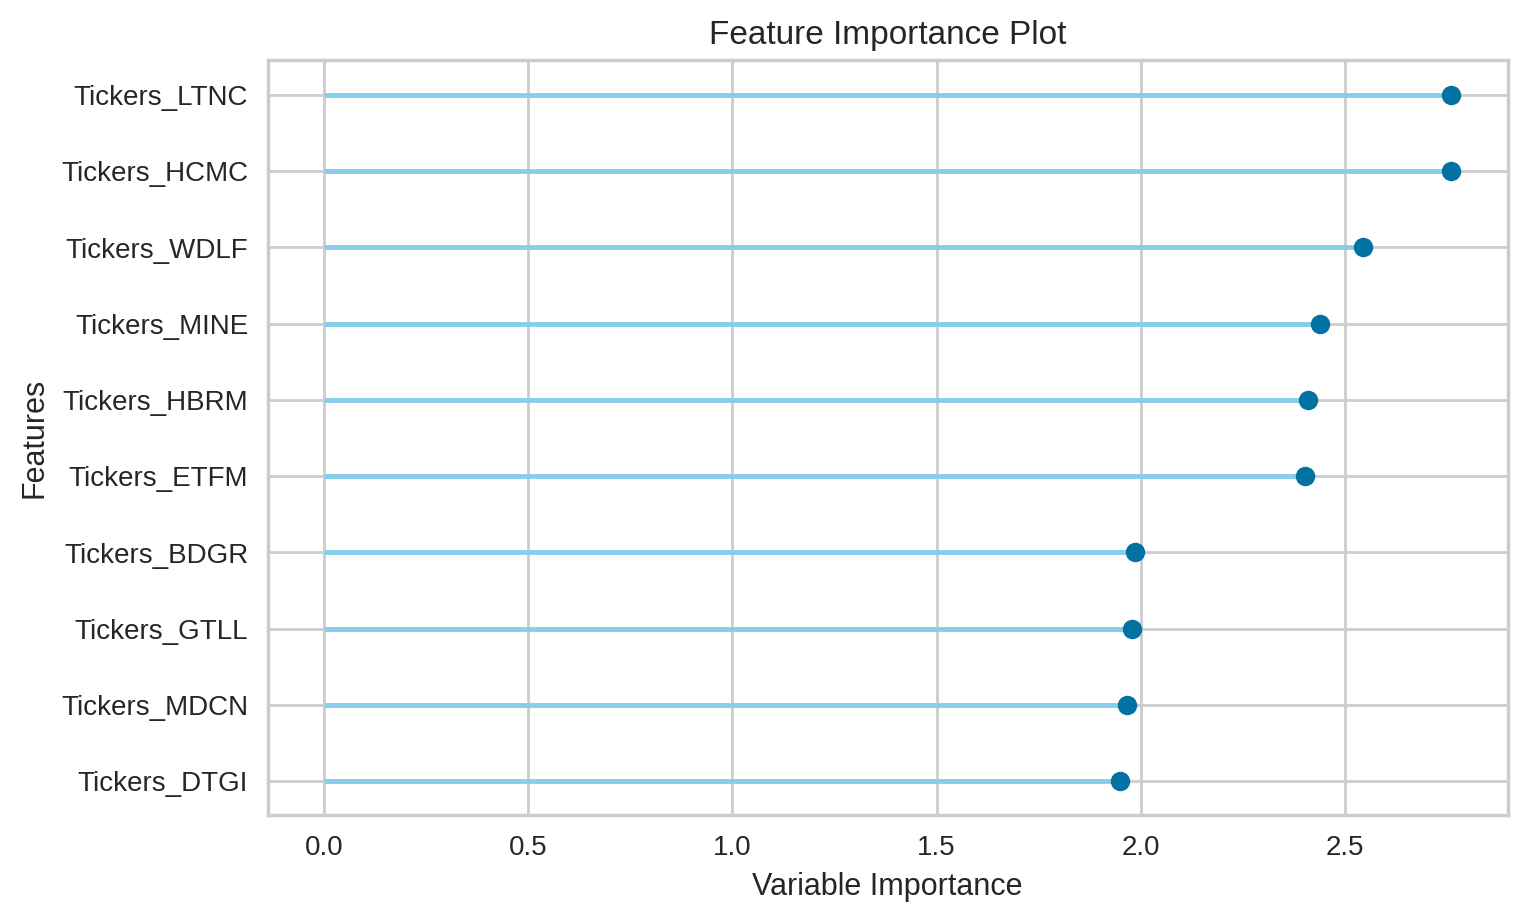

In [80]:
plot_model(lr,'feature',scale=2)

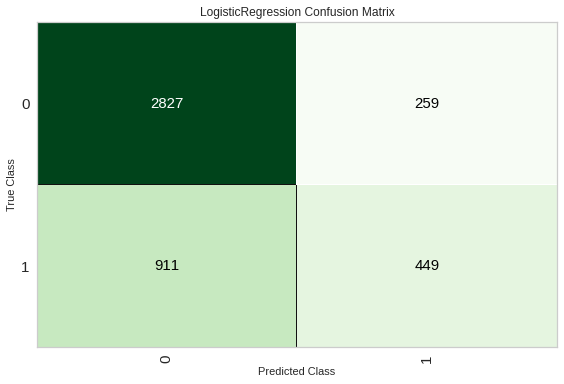

In [81]:
plot_model(lr,'confusion_matrix')

In [82]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7466,0.7848,0.4663,0.6307,0.5362,0.3672,0.3751
1,0.7669,0.8168,0.5015,0.6749,0.5754,0.4195,0.4283
2,0.7611,0.8036,0.4587,0.6787,0.5474,0.3933,0.4072
3,0.7551,0.8017,0.4969,0.6429,0.5606,0.3946,0.4009
4,0.7406,0.7959,0.4448,0.6223,0.5188,0.3479,0.3571
5,0.7261,0.7915,0.4294,0.5882,0.4965,0.3146,0.3220
6,0.7261,0.7869,0.4110,0.5929,0.4855,0.3072,0.3167
7,0.7763,0.8108,0.4785,0.7156,0.5735,0.4299,0.4459
8,0.7715,0.8058,0.4816,0.6978,0.5699,0.4213,0.4347
9,0.7657,0.8228,0.4877,0.6766,0.5668,0.4120,0.4223


In [83]:
tuned_lgbm = tune_model(lgbm,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7013,0.7072,0.4479,0.5290,0.4850,0.2768,0.2787
1,0.7206,0.7401,0.4771,0.5673,0.5183,0.3236,0.3260
2,0.7158,0.7344,0.5046,0.5537,0.5280,0.3253,0.3260
3,0.7020,0.7153,0.4264,0.5326,0.4736,0.2693,0.2726
4,0.7068,0.7312,0.4693,0.5387,0.5016,0.2954,0.2968
5,0.7175,0.7379,0.4540,0.5627,0.5025,0.3084,0.3118
6,0.7020,0.7161,0.4724,0.5292,0.4992,0.2881,0.2890
7,0.7425,0.7628,0.5337,0.6021,0.5659,0.3838,0.3852
8,0.7001,0.7390,0.4417,0.5275,0.4808,0.2723,0.2744
9,0.7184,0.7492,0.5276,0.5548,0.5409,0.3380,0.3382


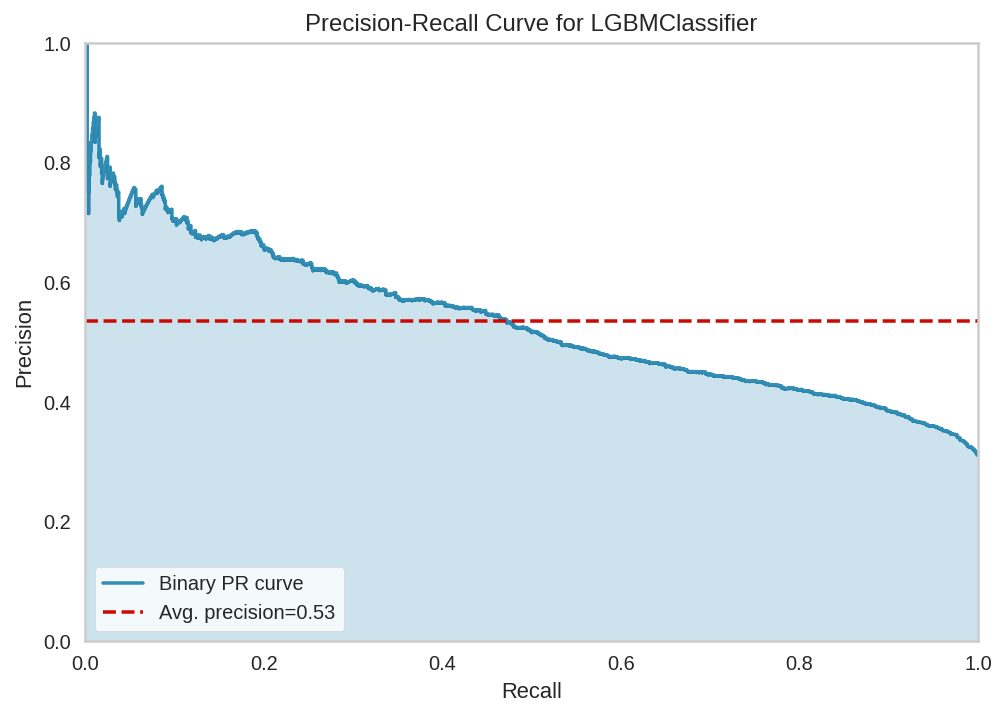

In [84]:
plot_model(tuned_lgbm,'pr',scale=2)

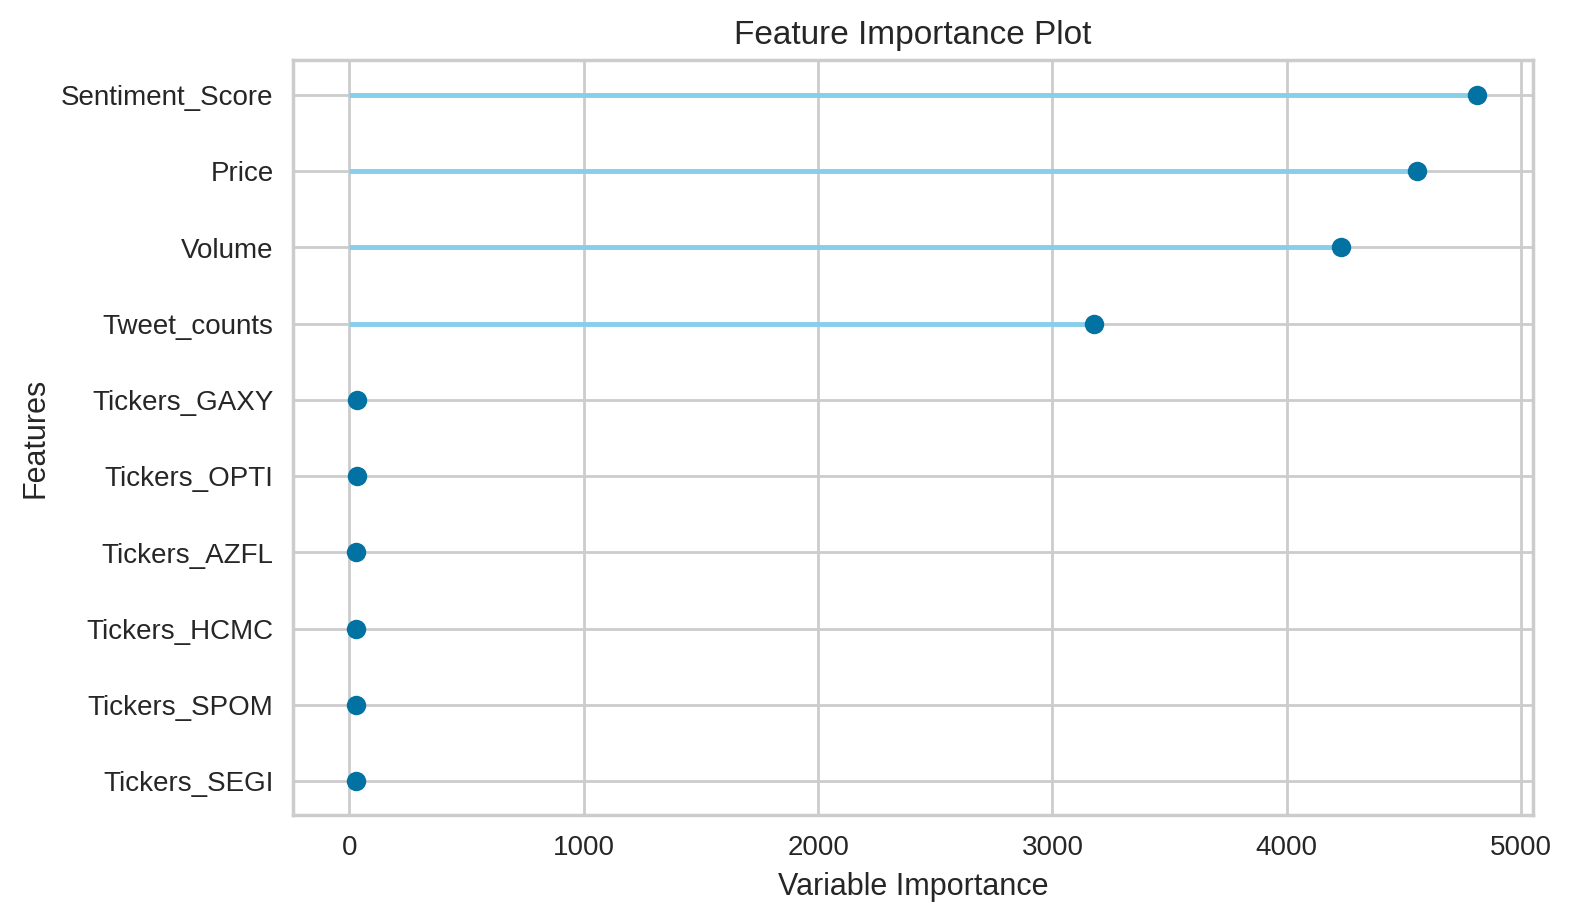

In [86]:
plot_model(tuned_lgbm,'feature',scale=2)

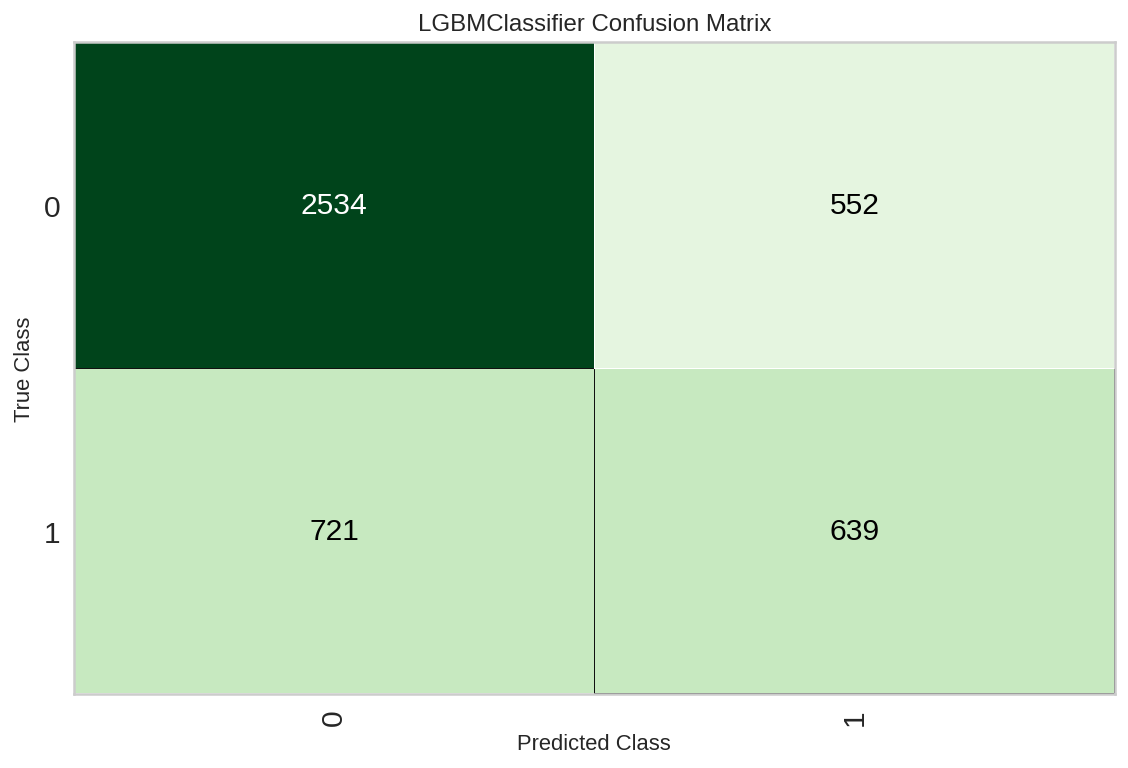

In [87]:
plot_model(tuned_lgbm,'confusion_matrix',scale=2)